# PROJETO CODENATION

## Problema de Negócio: 
Criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016

In [1]:
# Importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from statistics import mode
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importando o conjuntos de dados de treino e teste
df_treino = pd.read_csv('train.csv')
df_teste = pd.read_csv('test.csv')

### Visualizando os dados de treino

In [3]:
df_treino.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


### Visualizando os dados de teste

In [4]:
df_teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


## DATA WRANGLING

In [5]:
# Formato dos dados de treino (Linha/Coluna)
df_treino.shape

(13730, 167)

In [6]:
# Formato dos dados de teste (Linha/Coluna)
df_teste.shape

(4576, 47)

Como temos dois conjuntos de dados (treino e teste), e os mesmos não tem a mesma quantidade de colunas, 
vou reduzir o tamanho do dataset de treino, para que ele contenha apenas as colunas que o dataset de teste tambem tenha.
Além disso, depois de termos limpado, organizado, e manipulado os dados de treino, vamos repetir o procedimento com os dados de teste.

In [7]:
# Criando uma copia do dataframe de treino, com apenas as colunas que o dataframe de teste tenha.
df_treino2 = df_treino[df_teste.columns]

In [8]:
print('Quantidade de linhas no dataset de treino: {}'.format(df_treino2.shape[0]))
print('Quantidade de colunas no dataset de treino: {}'.format(df_treino2.shape[1]))
print('\n')
print('Quantidade de linhas no dataset de teste: {}'.format(df_teste.shape[0]))
print('Quantidade de colunas no dataset de teste: {}'.format(df_teste.shape[1]))
print('\n')
print('Agora temos as mesmas colunas nos dois datasets, mas está faltando uma... a variável target !')

Quantidade de linhas no dataset de treino: 13730
Quantidade de colunas no dataset de treino: 47


Quantidade de linhas no dataset de teste: 4576
Quantidade de colunas no dataset de teste: 47


Agora temos as mesmas colunas nos dois datasets, mas está faltando uma... a variável target !


In [9]:
# Agora precisamos trazer a variavel target (a qual vamos prever) para o nosso dataset, pois ela não estava no df de teste
df_treino2['target'] = df_treino['NU_NOTA_MT']

In [10]:
# Visualizando os dados
df_treino2.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,target
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,NaN


In [11]:
# Resumo estatístico
df_treino2.describe(include='all')

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,target
count,13730,13730.000000,13730,13730.000000,13730,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,...,10133.000000,13730,13730,13730,13730,13730,13730,6357,13730,10133.000000
unique,13730,NaN,27,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,8,8,17,5,2,3,13,5,NaN
top,3256bace6342bd00fbd7954ba61442fe71d6bed7,NaN,SP,NaN,F,NaN,NaN,NaN,NaN,NaN,...,NaN,B,E,B,B,B,A,F,A,NaN
freq,1,NaN,2138,NaN,8491,NaN,NaN,NaN,NaN,NaN,...,NaN,3309,3883,4264,6441,7815,7215,1267,11726,NaN
mean,NaN,30.736708,NaN,21.593809,NaN,2.185652,1.048871,1.782666,2.146176,1.353532,...,529.048258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,482.497928
std,NaN,9.862405,NaN,7.043654,NaN,1.007285,0.258895,0.880734,3.217328,0.558472,...,154.294758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.826323
min,NaN,11.000000,NaN,13.000000,NaN,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,23.000000,NaN,17.000000,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,...,440.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408.900000
50%,NaN,31.000000,NaN,19.000000,NaN,3.000000,1.000000,2.000000,0.000000,1.000000,...,540.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461.200000
75%,NaN,35.000000,NaN,23.000000,NaN,3.000000,1.000000,2.000000,3.000000,2.000000,...,600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537.600000


In [12]:
# Tipos de dados
df_treino2.dtypes

NU_INSCRICAO               object
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                    object
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
CO_PROVA_CN                object
CO_PROVA_CH                object
CO_PROVA_LC                object
CO_PROVA_MT                object
NU_NOTA_CN                float64
NU_NOTA_CH    

### Medidas estatísticas

In [13]:
# Resumo estatístico apenas da varíavel target, a qual vamos prever.
df_treino2['target'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: target, dtype: float64

In [14]:
# Média / Mediana / Moda
print('Média: {}'.format(round(df_treino2['target'].dropna().mean(), ndigits = 2)))
print('Mediana: {}'.format(df_treino2['target'].median()))
print('Moda: {}'.format(df_treino2['target'].mode()))

Média: 482.5
Mediana: 461.2
Moda: 0    445.3
dtype: float64


In [15]:
# Desvio Padrão
round(np.std(df_treino2.target),2)

99.82

In [16]:
# Notas mínimas e máximas da variável target
print('Range das notas de matemática: {} ao {}'.format(int(df_treino2['target'].min()),
                                                             int(df_treino2['target'].max())))

Range das notas de matemática: 0 ao 952


In [17]:
# Quantidade de notas 0
pd.value_counts(df_treino2['target'] == 0)

False    13720
True        10
Name: target, dtype: int64

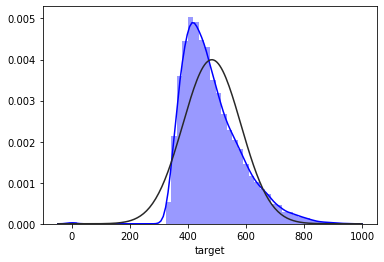

Proxima de uma distribuição normal, porém temos uma assimetria positiva, onde a cauda do lado esquerdo é maior 
que a do lado direito. Nesse caso temos a média maior que a mediana.


In [18]:
sn.distplot(df_treino2['target'].dropna(), color='blue', fit=norm)
plt.show()
print('Proxima de uma distribuição normal, porém temos uma assimetria positiva, onde a cauda do lado esquerdo é maior \n'
      'que a do lado direito. Nesse caso temos a média maior que a mediana.')

In [19]:
# Valores de Skewness (Assimetria) e Kurtosis(Achatamento) 
print('Skewness %f' %df_treino2['target'].skew())
print('Kurtosis %f' %df_treino2['target'].kurt())

Skewness 0.920690
Kurtosis 1.422503


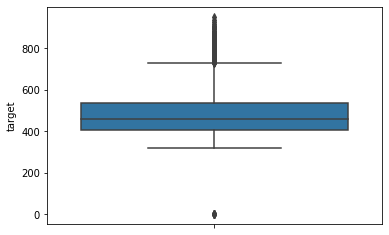

In [20]:
# Outliers da variável target
sn.boxplot(df_treino2.target, orient='v');

### Tratando Valores Missing 

In [21]:
# Criando uma cópia do dataframe
df = df_treino2.copy()

In [22]:
# Quantidade total de valores Missings da variavel target.
df['target'].isnull().sum()

3597

In [23]:
# Valores missing em todas as colunas
df.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATU

In [24]:
# Deletando as colunas TP_ENSINO, TP_DEPENDENCIA_ADM_ESC, Q027 pois contem muitos valores NaN
cols = ['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027']
df.drop(cols, axis=1, inplace=True)

In [25]:
# Deletando as linhas das variaveis restantes com valores missing
df.dropna(axis=0, inplace=True)

In [26]:
# Agora temos um dataset sem valores missing
df.isna().sum()

NU_INSCRICAO         0
CO_UF_RESIDENCIA     0
SG_UF_RESIDENCIA     0
NU_IDADE             0
TP_SEXO              0
TP_COR_RACA          0
TP_NACIONALIDADE     0
TP_ST_CONCLUSAO      0
TP_ANO_CONCLUIU      0
TP_ESCOLA            0
IN_TREINEIRO         0
IN_BAIXA_VISAO       0
IN_CEGUEIRA          0
IN_SURDEZ            0
IN_DISLEXIA          0
IN_DISCALCULIA       0
IN_SABATISTA         0
IN_GESTANTE          0
IN_IDOSO             0
TP_PRESENCA_CN       0
TP_PRESENCA_CH       0
TP_PRESENCA_LC       0
CO_PROVA_CN          0
CO_PROVA_CH          0
CO_PROVA_LC          0
CO_PROVA_MT          0
NU_NOTA_CN           0
NU_NOTA_CH           0
NU_NOTA_LC           0
TP_LINGUA            0
TP_STATUS_REDACAO    0
NU_NOTA_COMP1        0
NU_NOTA_COMP2        0
NU_NOTA_COMP3        0
NU_NOTA_COMP4        0
NU_NOTA_COMP5        0
NU_NOTA_REDACAO      0
Q001                 0
Q002                 0
Q006                 0
Q024                 0
Q025                 0
Q026                 0
Q047       

### Selecionando colunas que indicam algo relacionado a pessoa, número 1 para positivo e 0 para negativo, vou verificar a quantidade de casos positivos, se for muito baixo, não vou usar a coluna para o modelo preditivo

In [27]:
# Colunas selecionadas para análise
COLS = ['IN_TREINEIRO',         
'IN_BAIXA_VISAO',       
'IN_CEGUEIRA',          
'IN_SURDEZ',            
'IN_DISLEXIA',          
'IN_DISCALCULIA',       
'IN_SABATISTA',         
'IN_GESTANTE',          
'IN_IDOSO']

In [28]:
# Analisando quantidade de resultados positivos
[pd.value_counts(df[i]) for i in df[COLS]]

[0    8599
 1    1498
 Name: IN_TREINEIRO, dtype: int64, 0    10086
 1       11
 Name: IN_BAIXA_VISAO, dtype: int64, 0    10097
 Name: IN_CEGUEIRA, dtype: int64, 0    10093
 1        4
 Name: IN_SURDEZ, dtype: int64, 0    10096
 1        1
 Name: IN_DISLEXIA, dtype: int64, 0    10096
 1        1
 Name: IN_DISCALCULIA, dtype: int64, 0    9998
 1      99
 Name: IN_SABATISTA, dtype: int64, 0    10093
 1        4
 Name: IN_GESTANTE, dtype: int64, 0    10096
 1        1
 Name: IN_IDOSO, dtype: int64]

### Como a quantidade de casos positivos é muito baixa, nosso modelo não terá dados suficientes para aprender quando este fato ocorrer. 
### Não vamos usar aquelas variáveis.

Agora vou selecionar as variáveis que na minha visão acho que são mais importantes, depois disso vamos utilizar técnicas
de correlação entre as variáveis que escolhi. Caso o modelo de machine learning não tenha uma boa performance, voltarei e
selecionarei outras variáveis.

In [29]:
# Selecionando as variáveis
df1 = df[['NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 
               'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH',
              'NU_NOTA_LC','NU_NOTA_REDACAO', 'target']]

### Mudando os nomes das colunas

In [30]:
# Novos nomes
df1.columns = ['idade','sexo','raca','ensino_medio','tipo_escola', 'nota_natureza', 'nota_humanas', 'nota_linguagens','nota_redacao', 'target']

In [31]:
# Visualizando
df1.head()

,idade,sexo,raca,ensino_medio,tipo_escola,nota_natureza,nota_humanas,nota_linguagens,nota_redacao,target
0,24,M,1,1,1,436.3,495.4,581.2,520.0,399.4
1,17,F,3,2,2,474.5,544.1,599.0,580.0,459.8
5,18,F,1,1,1,439.7,583.2,410.9,620.0,364.5
6,18,F,3,2,2,420.1,604.2,484.5,560.0,529.2
7,18,F,1,1,1,619.6,625.8,611.2,620.0,566.7


### Agora precisamos mudar os tipos de dados

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10097 entries, 0 to 13729
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idade            10097 non-null  int64  
 1   sexo             10097 non-null  object 
 2   raca             10097 non-null  int64  
 3   ensino_medio     10097 non-null  int64  
 4   tipo_escola      10097 non-null  int64  
 5   nota_natureza    10097 non-null  float64
 6   nota_humanas     10097 non-null  float64
 7   nota_linguagens  10097 non-null  float64
 8   nota_redacao     10097 non-null  float64
 9   target           10097 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 867.7+ KB


In [33]:
# Variável tipo_escola para tipo categórico
df1.tipo_escola = pd.Categorical(df1.tipo_escola)
df1.tipo_escola

0        1
1        2
5        1
6        2
7        1
        ..
13725    1
13726    1
13727    1
13728    1
13729    2
Name: tipo_escola, Length: 10097, dtype: category
Categories (4, int64): [1, 2, 3, 4]

### Mudando a variável sexo para númerica: Masculino = 0  e Feminino = 1

In [34]:
# Varíavel sexo
gender = {'M': 0, 'F': 1}
df1.sexo = [gender[item] for item in df1.sexo] 
df1.sexo = pd.Categorical(df1.sexo)

In [35]:
# Método apply para aplicar uma função em várias variáveis
cols = ['raca','ensino_medio']
df1[cols] = df1[cols].apply(pd.Categorical)

### Agora temos os dados ajustados corretamente com seus tipos

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10097 entries, 0 to 13729
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   idade            10097 non-null  int64   
 1   sexo             10097 non-null  category
 2   raca             10097 non-null  category
 3   ensino_medio     10097 non-null  category
 4   tipo_escola      10097 non-null  category
 5   nota_natureza    10097 non-null  float64 
 6   nota_humanas     10097 non-null  float64 
 7   nota_linguagens  10097 non-null  float64 
 8   nota_redacao     10097 non-null  float64 
 9   target           10097 non-null  float64 
dtypes: category(4), float64(5), int64(1)
memory usage: 592.3 KB


# Hora de trabalharmos com Feature Engineering, ou engenheira de atributos, em português.
### O que acham de criar uma coluna com a média das notas? Eu acho ótimo, vamos fazer isso !

In [37]:
# Cópia do dataframe
df2 = df1.copy()

In [38]:
# Criando nova coluna chamada media
df2['media'] = (df2.nota_humanas + df2.nota_linguagens + df2.nota_natureza + df2.nota_redacao) / 4

In [39]:
df2['media']

0        508.225
1        549.400
5        513.450
6        517.200
7        619.150
          ...   
13725    423.100
13726    518.675
13727    539.675
13728    518.300
13729    537.475
Name: media, Length: 10097, dtype: float64

### Conferindo a estrutura dos dados

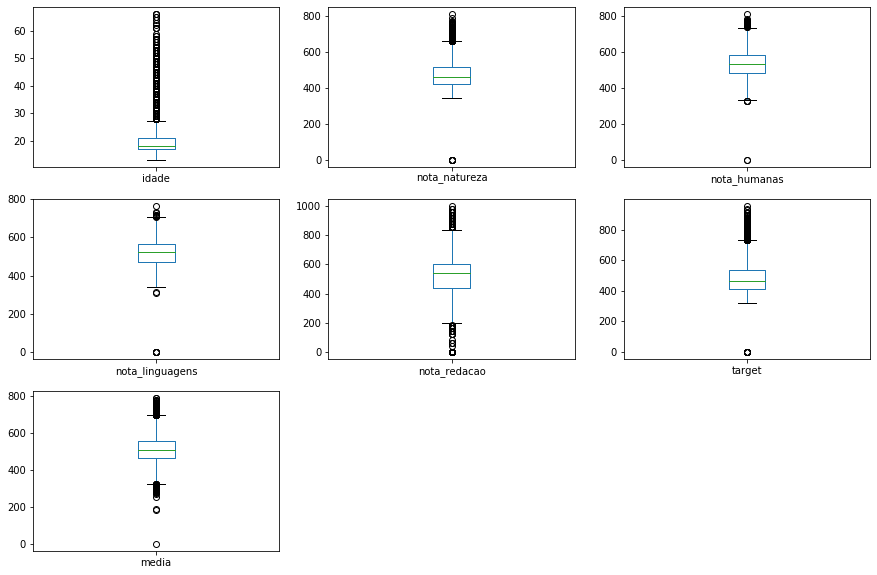

In [40]:
df2.plot(kind='box', subplots = True, layout = (3,3), sharex= False, sharey = False, figsize = (15,10))
plt.show()

In [41]:
df2.describe()

,idade,nota_natureza,nota_humanas,nota_linguagens,nota_redacao,target,media
count,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000
mean,20.575517,473.912509,530.346123,516.665059,529.452907,482.648638,512.594149
std,6.345231,71.098468,73.528309,68.442602,154.001881,99.685820,75.381623
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,420.100000,481.000000,468.600000,440.000000,409.000000,463.425000
50%,18.000000,460.400000,532.600000,521.100000,540.000000,461.300000,507.450000
75%,21.000000,515.100000,581.900000,564.900000,600.000000,537.700000,557.650000
max,66.000000,806.400000,807.000000,763.600000,1000.000000,952.000000,789.200000


### Vou criar mais uma variável, chamada best_students
### Número 0 irá representar que o aluno teve uma média menor que 550, e 1 maior ou igual a 550.
Poderia ser qualquer valor acima da média das médias (512.59 nesse caso), mas estou escolhendo 550.

In [42]:
# Loop for
for i in df2.media:
    if i >= 550:
        df2['best_students'] = 1
    else:
        df2['best_students'] = 0
        

In [43]:
# Convertendo para variável categórica
df2.best_students = pd.Categorical(df2.best_students)

### Mais uma coluna, agora com o total das 4 notas somadas (humanas, linguagens, natureza, redação)

In [44]:
# Criando nova coluna
df2['total'] = (df2.nota_humanas + df2.nota_linguagens + df2.nota_natureza + df2.nota_redacao)

In [45]:
# Visualizando
df2.head()

,idade,sexo,raca,ensino_medio,tipo_escola,nota_natureza,nota_humanas,nota_linguagens,nota_redacao,target,media,best_students,total
0,24,0,1,1,1,436.3,495.4,581.2,520.0,399.4,508.225,0,2032.9
1,17,1,3,2,2,474.5,544.1,599.0,580.0,459.8,549.400,0,2197.6
5,18,1,1,1,1,439.7,583.2,410.9,620.0,364.5,513.450,0,2053.8
6,18,1,3,2,2,420.1,604.2,484.5,560.0,529.2,517.200,0,2068.8
7,18,1,1,1,1,619.6,625.8,611.2,620.0,566.7,619.150,0,2476.6


## Removendo outliers

### Coluna Idade

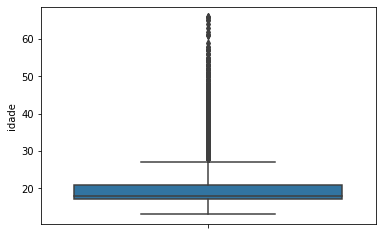

In [46]:
# Boxplot da variável idade
sn.boxplot(df2.idade, orient='v')

In [47]:
# Verificando a quantidade de idades maiores que 30
len(df2.idade[df2.idade > 30])

761

In [48]:
# Vou remover as linhas com idades maiores que 30, perderemos um pouco de dados, 
# mas o modelo terá uma performance melhor sem outliers
df3 = df2[df2.idade <= 30]

### Coluna nota_natureza

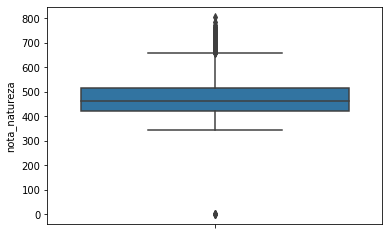

In [49]:
# Boxplot
sn.boxplot(df3.nota_natureza, orient='v')

In [50]:
# Quantidade de notas maiores que 700 e iguais a 0
len(df3[(df3.nota_natureza > 700) | (df3.nota_natureza == 0)])

55

In [51]:
# Removendo notas maiores que 700 e iguais a 0
df4 = df3[(df3.nota_natureza <= 700) & (df3.nota_natureza != 0)]

### Coluna nota_humanas

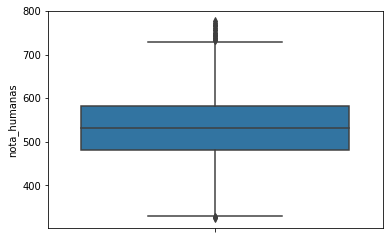

In [52]:
# Boxplot
sn.boxplot(df4.nota_humanas, orient='v')

In [53]:
# Quantidade de notas maiores que 750 e iguais a 0
len(df4[(df4.nota_humanas > 750) | (df4.nota_humanas == 0) ])

9

In [54]:
# Removendo notas maiores que 750 e iguais a 0
df5 = df4[(df4.nota_humanas <= 750) & (df4.nota_humanas != 0)]

### Coluna nota_linguagens

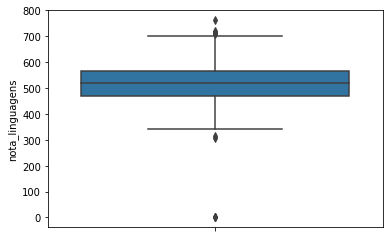

In [55]:
# Boxplot
sn.boxplot(df5.nota_linguagens, orient='v')

In [56]:
# Quantidade de notas maiores que 720 e menores que 350
len(df5[(df5.nota_linguagens > 720) | (df5.nota_linguagens < 350)])

17

In [57]:
# Removendo notas maiores que 720 e menores que 350
df6 = df5[(df5.nota_linguagens <= 720) & (df5.nota_linguagens > 350)]

### Coluna nota_redacao

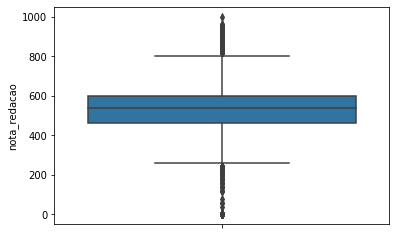

In [58]:
# Boxplot
sn.boxplot(df6.nota_redacao, orient='v')

In [59]:
# Quantidade de notas maiores que 900 e menores que 100
len(df6[(df6.nota_redacao > 900) | (df6.nota_redacao < 100)])

290

In [60]:
# Removendo notas maiores que 900 e menores que 100
df7 = df6[(df6.nota_redacao <= 900) & (df6.nota_redacao > 100)]

### Coluna target

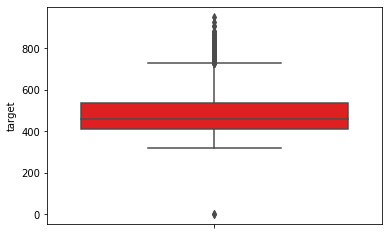

In [61]:
# Boxplot
sn.boxplot(df7.target, orient='v', color = 'r')

In [62]:
# Quantidade de notas acima de 750 e iguais a 0
len(df7[(df7.target > 750) | (df7.target == 0)])

125

In [63]:
# Removendo notas acima de 750 e iguais a 0
df8 = df7[(df7.target <= 750) & (df7.target != 0)]

### BoxPlot das variáveis

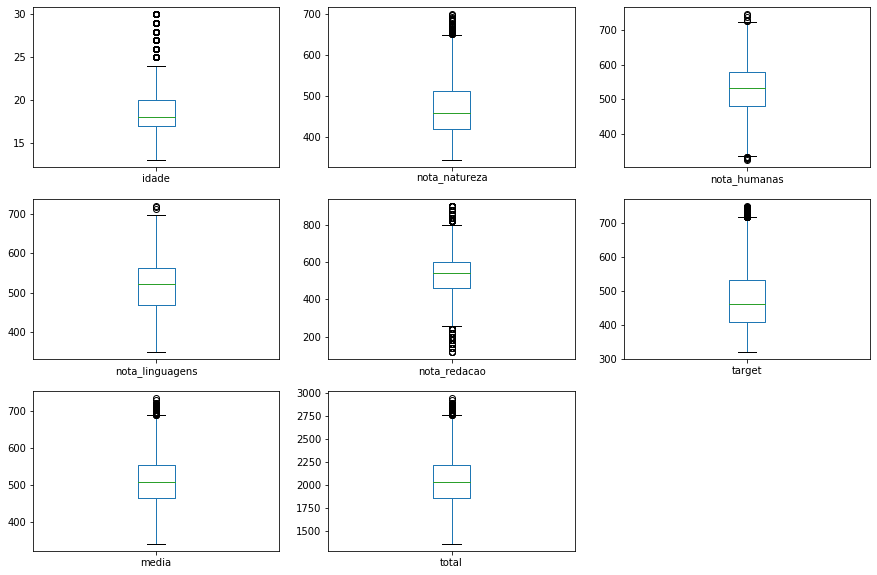

Ficou melhor, mas não perfeito, vou optar por deixar assim, se precisar removerei o resto dos outliers depois


In [64]:
df8.plot(kind='box', subplots = True, layout = (3,3), sharex= False, sharey = False, figsize = (15,10));
plt.show()
print('Ficou melhor, mas não perfeito, vou optar por deixar assim, se precisar removerei o resto dos outliers depois')

### Conferindo tamanho do dataset
Após removermos alguns dados, obviamente perdemos em quantidade, por mais que seja pouca perdemos. Porém iremos ganhar em qualidade quando formos treinar nosso modelo de machine learning. O mesmo conceito para os valores NaN.

In [65]:
df8.shape

(8840, 13)

# ANÁLISE EXPLORATÓRIA
###  Gerando insights 
#### “Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question, which can always be made precise.” — John Tukey

In [66]:
# Copiando dataframe
df_exp = df8.copy()

In [67]:
df_exp.head()

,idade,sexo,raca,ensino_medio,tipo_escola,nota_natureza,nota_humanas,nota_linguagens,nota_redacao,target,media,best_students,total
0,24,0,1,1,1,436.3,495.4,581.2,520.0,399.4,508.225,0,2032.9
1,17,1,3,2,2,474.5,544.1,599.0,580.0,459.8,549.400,0,2197.6
5,18,1,1,1,1,439.7,583.2,410.9,620.0,364.5,513.450,0,2053.8
6,18,1,3,2,2,420.1,604.2,484.5,560.0,529.2,517.200,0,2068.8
7,18,1,1,1,1,619.6,625.8,611.2,620.0,566.7,619.150,0,2476.6


### Média das notas para cada tipo de escola

In [68]:
# Quantidade de valores para os diferentes tipos de escola
# 1 Não Respondeu
# 2 Pública
# 3 Privada
# 4 Exterior

pd.value_counts(df_exp.tipo_escola)

1    5450
2    2931
3     458
4       1
Name: tipo_escola, dtype: int64

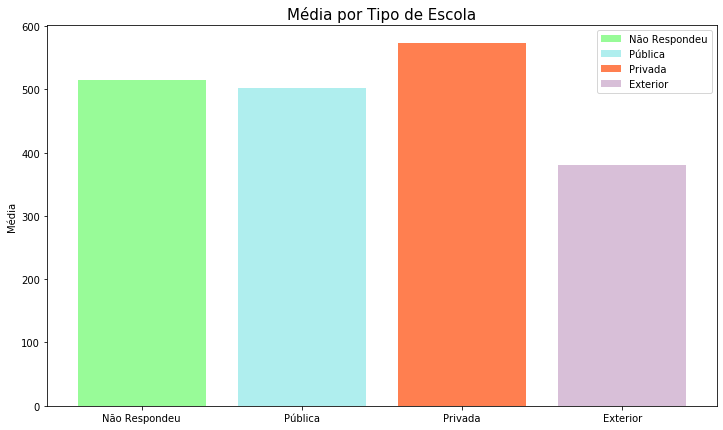

Como eu já esperava, as escolas privadas tiveram notas mais altas


In [69]:
y = df_exp.groupby('tipo_escola')['media'].mean()
ypos = y.values
xpos = np.arange(4)
labels = ['Não Respondeu', 'Pública', 'Privada','Exterior']


plt.figure(figsize=(12,7));
ax = plt.bar(xpos, ypos, width=0.8, color = ['palegreen','paleturquoise','coral','thistle'], label = labels)
plt.xticks(xpos, labels);
plt.ylabel('Média');
plt.legend(ax, labels)
plt.title('Média por Tipo de Escola', fontsize=15)
plt.show(ax)

print('Como eu já esperava, as escolas privadas tiveram notas mais altas')

### Média por raça

In [70]:
# Quantidade de valores para cada raça/cor:
# 0 Não declarado
# 1 Branca
# 2 Preta
# 3 Parda
# 4 Amarela
# 5 Indígena 

pd.value_counts(df_exp.raca)

3    4301
1    3007
2    1131
4     210
0     137
5      54
Name: raca, dtype: int64

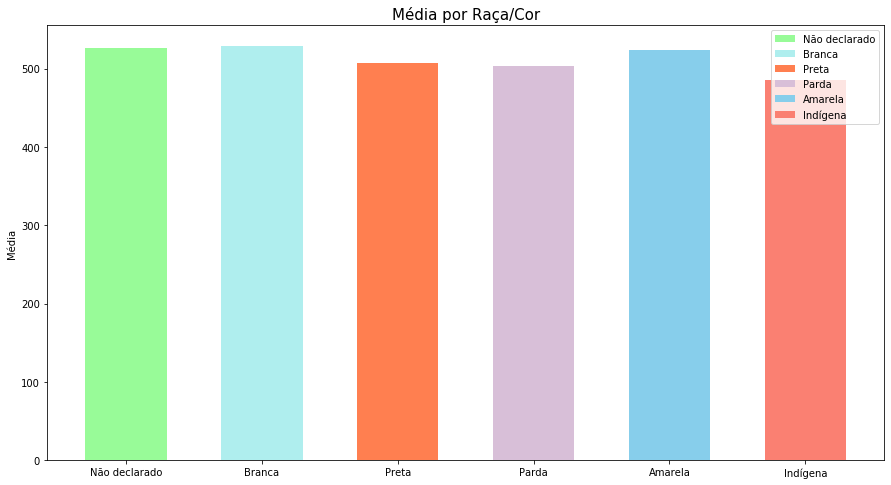

Pouca diferença da média entre as diferentes raças. Indígena um pouco abaixo das demais


In [71]:
y = df_exp.groupby('raca')['media'].mean()
ypos = y.values
xpos = np.arange(6)
labels = ['Não declarado','Branca','Preta','Parda','Amarela','Indígena' ]

plt.figure(figsize=(15,8));
ax = plt.bar(xpos, ypos, width=0.6, color = ['palegreen','paleturquoise','coral','thistle','skyblue', 'salmon'], label = labels)
plt.xticks(xpos, labels);
plt.ylabel('Média');
plt.legend(ax, labels)
plt.title('Média por Raça/Cor', fontsize=15)
plt.show(ax)
print('Pouca diferença da média entre as diferentes raças. Indígena um pouco abaixo das demais')

### Média por sexo

In [72]:
# Quantidade de valores por sexo: Masculino = 0  e Feminino = 1
pd.value_counts(df_exp.sexo)

1    5520
0    3320
Name: sexo, dtype: int64

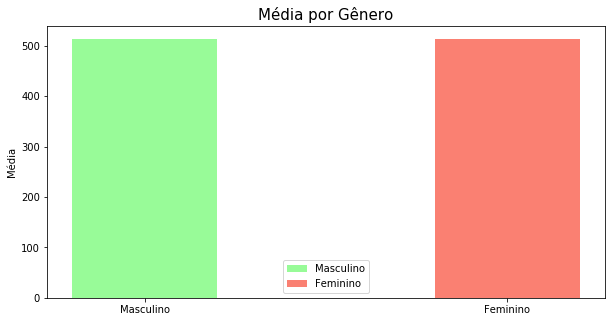

Pelo gráfico fica difícil notar alguma diferença

Segue a diferença em números


sexo
0    513.767553
1    512.849801
Name: media, dtype: float64

In [73]:
y = df_exp.groupby('sexo')['media'].mean()
ypos = y.values
xpos = np.arange(2)
labels = ['Masculino', 'Feminino' ]

plt.figure(figsize=(10,5));
ax = plt.bar(xpos, ypos, width=0.4, color = ['palegreen','salmon'], label = labels)
plt.xticks(xpos, labels);
plt.ylabel('Média');
plt.legend(ax, labels)
plt.title('Média por Gênero', fontsize=15)
plt.show(ax)
print('Pelo gráfico fica difícil notar alguma diferença\n')
print('Segue a diferença em números')
df_exp.groupby('sexo')['media'].mean()

## Plots
Scatter Plot é uma ótima opção de gráfico para avaliar a correlação entre duas variáveis, em outras palavras, o quanto um fator interfere no outro, por exemplo: quanto maior uma casa, maior o preço dela.

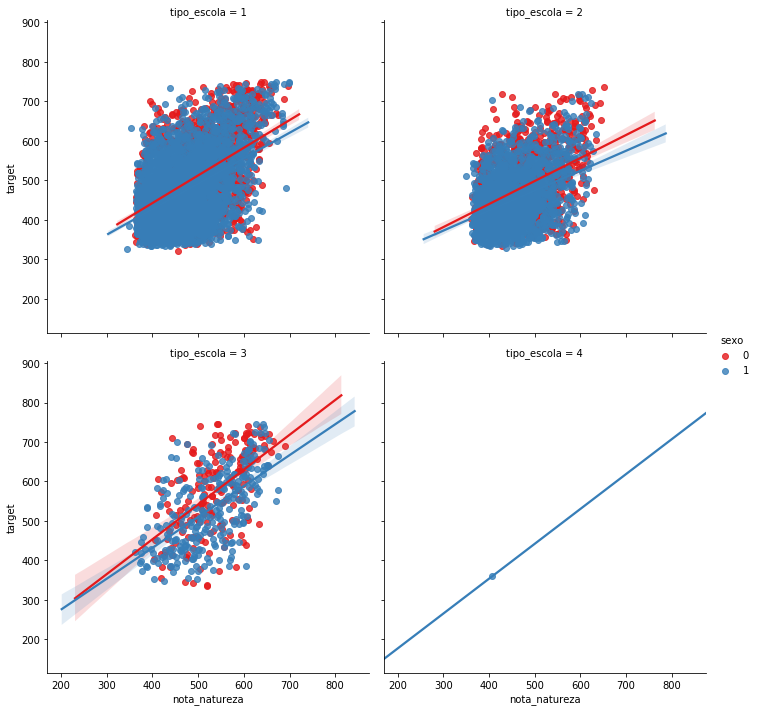

In [74]:
sn.lmplot(x='nota_natureza', y='target', hue='sexo', col='tipo_escola',data = df_exp, palette='Set1', 
         col_wrap = 2, size = 5)

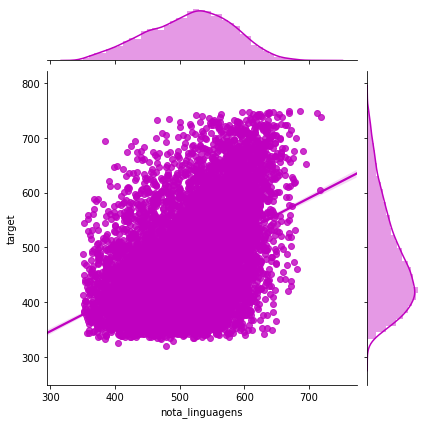

In [75]:
# Distribuição bivariada
sn.jointplot(x = "nota_linguagens", y = "target", data = df_exp, kind = "reg", color = "m")

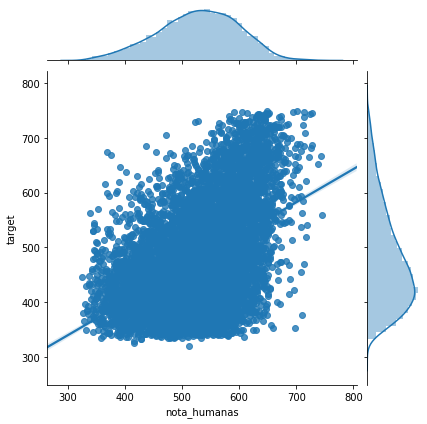

In [76]:
sn.jointplot(x='nota_humanas', y='target', data=df_exp, kind='reg')

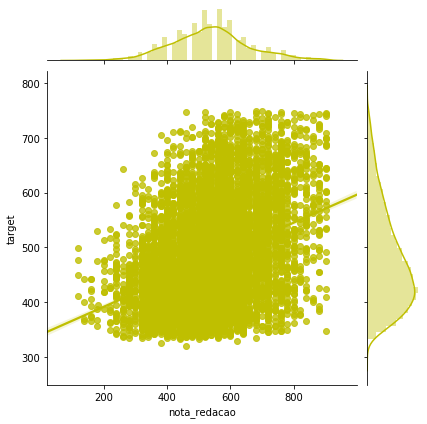

In [77]:
sn.jointplot(x='nota_redacao', y='target', data=df_exp, kind='reg', color='y')

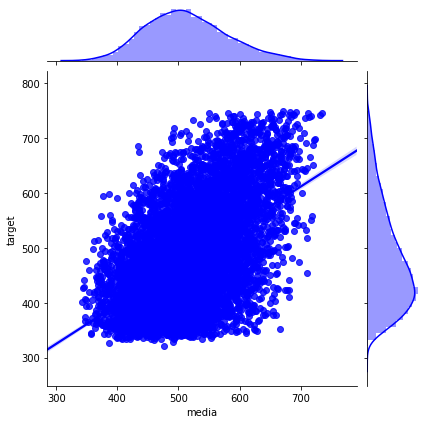

In [78]:
sn.jointplot(x='media', y='target', data=df_exp, kind='reg', color='b')

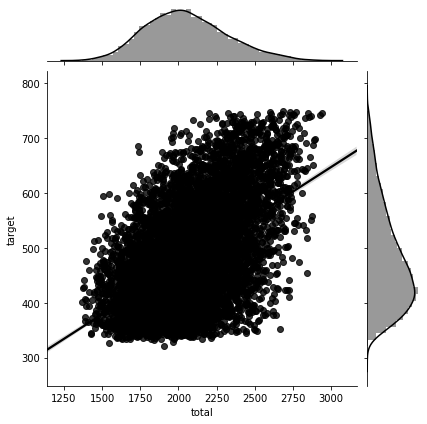

In [79]:
sn.jointplot(x='total', y='target', data=df_exp, kind='reg', color='k')

# ANÁLISE DE CORRELAÇÃO
A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

In [80]:
# Cópia do dataframe
dados = df_exp.copy()

In [81]:
dados.head()

,idade,sexo,raca,ensino_medio,tipo_escola,nota_natureza,nota_humanas,nota_linguagens,nota_redacao,target,media,best_students,total
0,24,0,1,1,1,436.3,495.4,581.2,520.0,399.4,508.225,0,2032.9
1,17,1,3,2,2,474.5,544.1,599.0,580.0,459.8,549.400,0,2197.6
5,18,1,1,1,1,439.7,583.2,410.9,620.0,364.5,513.450,0,2053.8
6,18,1,3,2,2,420.1,604.2,484.5,560.0,529.2,517.200,0,2068.8
7,18,1,1,1,1,619.6,625.8,611.2,620.0,566.7,619.150,0,2476.6


### Aqui vemos a importância do feature engineering,
### as duas variáveis com maior correlação positiva com a variável target, foram as duas que criei.

In [82]:
dados.corr(method='pearson')

,idade,nota_natureza,nota_humanas,nota_linguagens,nota_redacao,target,media,total
idade,1.000000,-0.013016,0.013550,0.006080,-0.063042,-0.010283,-0.027697,-0.027697
nota_natureza,-0.013016,1.000000,0.564388,0.513092,0.441381,0.505088,0.731471,0.731471
nota_humanas,0.013550,0.564388,1.000000,0.675208,0.552469,0.477668,0.832178,0.832178
nota_linguagens,0.006080,0.513092,0.675208,1.000000,0.517067,0.443255,0.796507,0.796507
nota_redacao,-0.063042,0.441381,0.552469,0.517067,1.000000,0.355475,0.853511,0.853511
target,-0.010283,0.505088,0.477668,0.443255,0.355475,1.000000,0.528498,0.528498
media,-0.027697,0.731471,0.832178,0.796507,0.853511,0.528498,1.000000,1.000000
total,-0.027697,0.731471,0.832178,0.796507,0.853511,0.528498,1.000000,1.000000


In [83]:
dados.skew()

idade              1.477801
sexo              -0.513994
raca              -0.173922
ensino_medio       0.543995
tipo_escola        1.008945
nota_natureza      0.670749
nota_humanas      -0.211511
nota_linguagens   -0.188767
nota_redacao       0.177445
target             0.739404
media              0.336939
best_students      0.000000
total              0.336939
dtype: float64

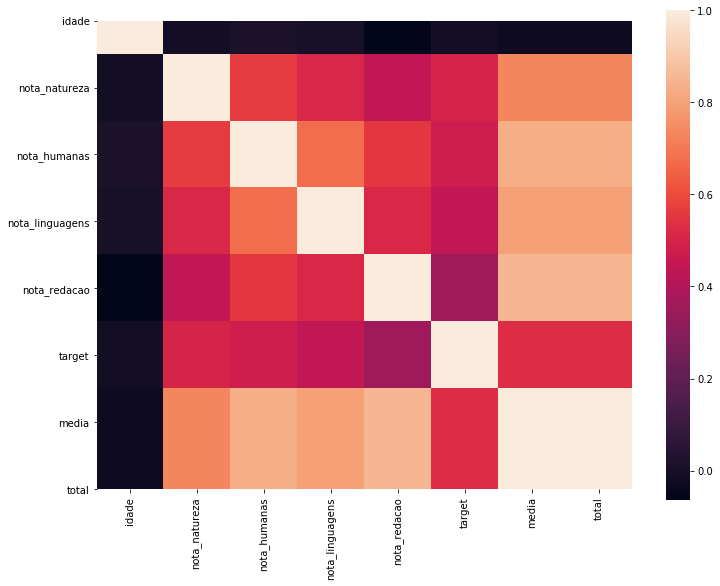

In [84]:
#correlation matrix
corrmat = dados.corr()
f, ax = plt.subplots(figsize=(12, 9))
sn.heatmap(corrmat, vmax=1, square=True);

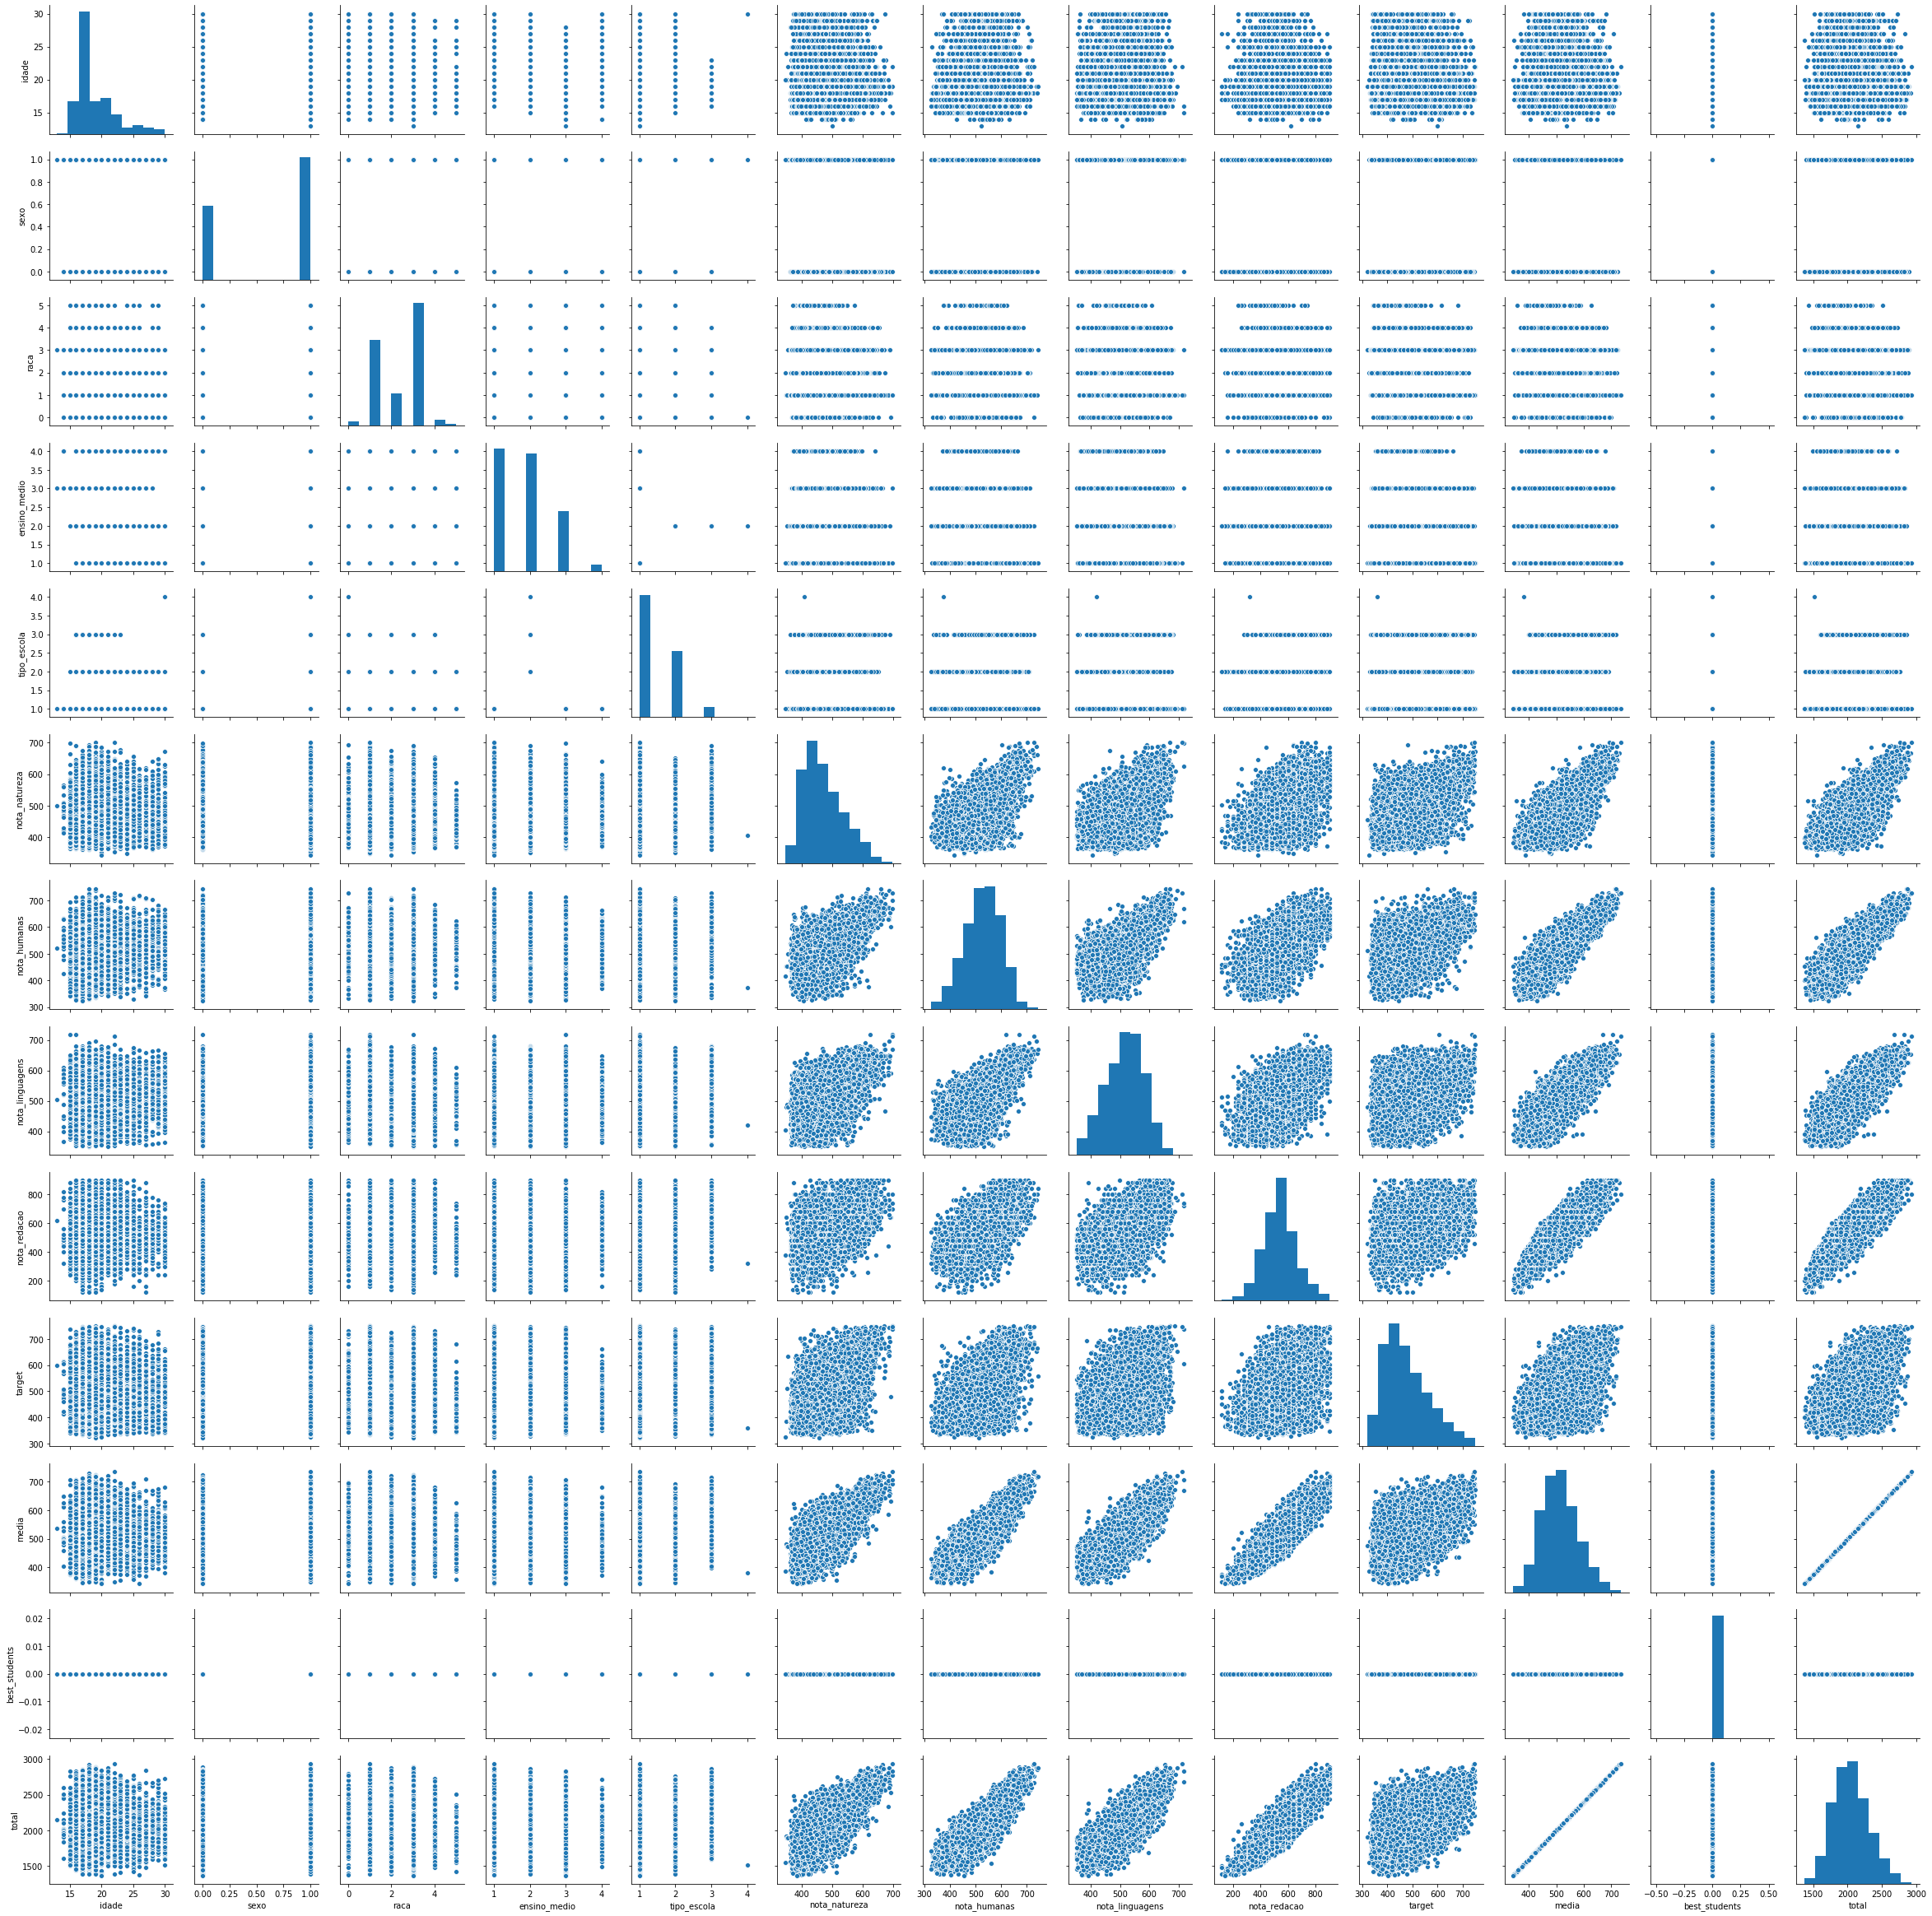

In [85]:
sn.pairplot(dados)

In [86]:
colunas = dados.columns

# PREPARANDO OS DADOS PARA O MODELO DE MACHINE LEARNING
## Deixando os dados de teste na mesma estrutura que os dados de treino


In [87]:
# Cópia do dataframe de treino
dados_treino = dados.copy()

In [88]:
# Info
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8840 entries, 0 to 13729
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   idade            8840 non-null   int64   
 1   sexo             8840 non-null   category
 2   raca             8840 non-null   category
 3   ensino_medio     8840 non-null   category
 4   tipo_escola      8840 non-null   category
 5   nota_natureza    8840 non-null   float64 
 6   nota_humanas     8840 non-null   float64 
 7   nota_linguagens  8840 non-null   float64 
 8   nota_redacao     8840 non-null   float64 
 9   target           8840 non-null   float64 
 10  media            8840 non-null   float64 
 11  best_students    8840 non-null   category
 12  total            8840 non-null   float64 
dtypes: category(5), float64(7), int64(1)
memory usage: 665.5 KB


In [89]:
# Visualizando dataset de teste
df_teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [90]:
# Formato
df_teste.shape

(4576, 47)

In [91]:
# Quantidade de valores missing
df_teste.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3096
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    3096
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                1134
NU_NOTA_CH                1134
NU_NOTA_LC                1199
TP_LINGUA                    0
TP_STATU

### Transformações

In [181]:
# Selecionando colunas
cols = ['NU_INSCRICAO','NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 
               'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH',
              'NU_NOTA_LC','NU_NOTA_REDACAO']

dados_teste = df_teste[cols]

# Mudando nome das colunas
dados_teste.columns = ['id','idade','sexo','raca','ensino_medio','tipo_escola', 'nota_natureza', 
                       'nota_humanas', 'nota_linguagens','nota_redacao']

# Alterando tipo dos dados

# Tipo Escola
dados_teste.tipo_escola = pd.Categorical(dados_teste.tipo_escola)

# Sexo
gender = {'M': 0, 'F': 1}
dados_teste.sexo = [gender[item] for item in dados_teste.sexo] 
dados_teste.sexo = pd.Categorical(dados_teste.sexo)

# Em varias variáveis
Cols = ['raca','ensino_medio']
dados_teste[Cols] = dados_teste[Cols].apply(pd.Categorical)

# Feature Engineering

# Variável media
dados_teste['media'] = (dados_teste.nota_humanas + dados_teste.nota_linguagens + 
                        dados_teste.nota_natureza + dados_teste.nota_redacao) / 4

# Variavel best_students
# Loop for
for i in dados_teste.media:
    if i >= 550:
        dados_teste['best_students'] = 1
    else:
        dados_teste['best_students'] = 0

# Variavel total
dados_teste['total'] = (dados_teste.nota_humanas + dados_teste.nota_linguagens + 
                        dados_teste.nota_natureza + dados_teste.nota_redacao)

# Removendo valores Missing
dados_teste.dropna(axis=0, inplace=True)

In [182]:
# Visualizando
dados_teste.head()

,id,idade,sexo,raca,ensino_medio,tipo_escola,nota_natureza,nota_humanas,nota_linguagens,nota_redacao,media,best_students,total
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,22,1,3,1,1,464.8,443.5,431.8,420.0,440.025,0,1760.1
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,26,1,3,1,1,391.1,491.1,548.0,580.0,502.550,0,2010.2
2,b38a03232f43b11c9d0788abaf060f7366053b6d,21,0,1,2,2,595.9,622.7,613.6,320.0,538.050,0,2152.2
4,715494628a50142ce8cb17191cfe6d0f3cae0934,18,0,1,2,2,592.9,492.6,571.4,320.0,494.225,0,1976.9
5,e656d6bad65c93fb2880f1eba5037008c8e75774,18,0,3,1,1,414.5,568.5,542.5,560.0,521.375,0,2085.5


In [183]:
# Quantidade de valores missing
dados_teste.isna().sum()

id                 0
idade              0
sexo               0
raca               0
ensino_medio       0
tipo_escola        0
nota_natureza      0
nota_humanas       0
nota_linguagens    0
nota_redacao       0
media              0
best_students      0
total              0
dtype: int64

In [184]:
# Formato
dados_teste.shape

(3360, 13)

In [185]:
# Gravando a coluna id em uma variavel, pois vamos utilizar depois
inscricao = dados_teste['id']

In [186]:
# Dataset de treino não terá a coluna id no modelo preditivo
dados_test = dados_teste.iloc[:,1:16]

In [187]:
# Trocando a ordem das colunas, deixando a variável target no final
dados_treino = dados_treino.reindex(['idade','sexo','raca','ensino_medio','tipo_escola',
                                     'nota_natureza', 'nota_humanas', 
                                     'nota_linguagens','nota_redacao','media','best_students','total','target'],
                     axis=1)

## Normalização

Uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala. Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com range entre 0 e 1. Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler().

In [615]:
# Cópia do dataframe
dadosTreino = dados_treino.copy()
dadosTreino.head()

,idade,sexo,raca,ensino_medio,tipo_escola,nota_natureza,nota_humanas,nota_linguagens,nota_redacao,media,best_students,total,target
0,24,0,1,1,1,436.3,495.4,581.2,520.0,508.225,0,2032.9,399.4
1,17,1,3,2,2,474.5,544.1,599.0,580.0,549.400,0,2197.6,459.8
5,18,1,1,1,1,439.7,583.2,410.9,620.0,513.450,0,2053.8,364.5
6,18,1,3,2,2,420.1,604.2,484.5,560.0,517.200,0,2068.8,529.2
7,18,1,1,1,1,619.6,625.8,611.2,620.0,619.150,0,2476.6,566.7


In [616]:
# Cópia do dataframe
dadosTeste = dados_test.copy()
dadosTeste.head()

,idade,sexo,raca,ensino_medio,tipo_escola,nota_natureza,nota_humanas,nota_linguagens,nota_redacao,media,best_students,total
0,22,1,3,1,1,464.8,443.5,431.8,420.0,440.025,0,1760.1
1,26,1,3,1,1,391.1,491.1,548.0,580.0,502.550,0,2010.2
2,21,0,1,2,2,595.9,622.7,613.6,320.0,538.050,0,2152.2
4,18,0,1,2,2,592.9,492.6,571.4,320.0,494.225,0,1976.9
5,18,0,3,1,1,414.5,568.5,542.5,560.0,521.375,0,2085.5


In [617]:
# Tamanho dos dados de treino
dadosTreino.shape

(8840, 13)

In [618]:
# Tamanho dos dados de teste
dados_test.shape

(3360, 12)

# Usando dados de Validação para testar o modelo

# Modelo Ridge Regression
Extensão para a regressão linear onde a loss function é modificada para minimizar a complexidade do modelo.

In [623]:
# Importando os dado
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# Colocando os valores em um array
array = dadosTreino.values

# Separando o array em componentes de input e output
# Usando as variáveis: nota_natureza, nota_humanas, nota_linguagens, nota_redacao, media
X = array[:,5:10]
Y = array[:,12]
Y = Y.reshape(-1,1)

# Normalizando
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

# Divide os dados em treino e teste
X_train, X_valid, Y_train, Y_valid = train_test_split(X_scaled, Y_scaled, test_size = 0.33, random_state = 5)

# Criando o modelo
modelo = Ridge()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_valid)

# Avaliando a Performance

#### MSE

É talvez a métrica mais simples e comum para a avaliação de regressão, mas também provavelmente a menos útil. O MSE basicamente mede o erro quadrado médio de nossas previsões. Para cada ponto, calcula a diferença quadrada entre as previsões e o valor real da variável alvo e, em seguida, calcula a média desses valores.

Quanto maior esse valor, pior é o modelo. Esse valor nunca será negativo, já que estamos elevando ao quadrado os erros individuais de previsão, mas seria zero para um modelo perfeito.

In [624]:
# Resultado
mse = mean_squared_error(Y_valid, Y_pred)
print("O MSE do modelo é:", mse)

O MSE do modelo é: 0.02775040141852958


### R^2
Essa métrica fornece uma indicação do nível de precisão das previsões em relação aos valores observados.
Também chamado de coeficiente de determinação.
Valores entre 0 e 1, sendo 1 o valor ideal.

In [625]:
# Resultado
r2 = r2_score(Y_valid, Y_pred)
print("O R2 do modelo é:", r2)

O R2 do modelo é: 0.32925117787755687


### MAE

Mean Absolute Error
É a soma da diferença absoluta entre previsões e valores reais.
Fornece uma ideia de quão erradas estão nossas previsões.
Valor igual a 0 indica que não há erro, sendo a previsão perfeita.

In [626]:
# Resultado
mae = mean_absolute_error(Y_valid, Y_pred)
print("O MAE do modelo é:", mae)

O MAE do modelo é: 0.1336646851082671


# Testando outros modelos
# Modelo KNN

In [627]:
# Colocando os valores em um array
array = dadosTreino.values

# Separando o array em componentes de input e output
# Usando as variáveis: nota_natureza, nota_humanas, nota_linguagens, nota_redacao, media
X = array[:,5:10]
Y = array[:,12]
Y = Y.reshape(-1,1)

# Normalizando
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

# Divide os dados em treino e teste
X_train, X_valid, Y_train, Y_valid = train_test_split(X_scaled, Y_scaled, test_size = 0.33, random_state = 5)

# Criando o modelo
modelo = KNeighborsRegressor()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_valid)

# Resultado
mse = mean_squared_error(Y_valid, Y_pred)
print("O MSE do modelo é:", round(mse,3))

# Resultado
r2 = r2_score(Y_valid, Y_pred)
print("O R2 do modelo é:", round(r2,3))

# Resultado
mae = mean_absolute_error(Y_valid, Y_pred)
print("O MAE do modelo é:", round(mae,3))

O MSE do modelo é: 0.033
O R2 do modelo é: 0.207
O MAE do modelo é: 0.144


### Criando um dataframe com os dados originais e previstos

In [702]:
# Voltando os dados preditores na escala original
original = scaler.inverse_transform(Y_valid)

original = pd.DataFrame(original)

# Voltando os dados previstos na escala original

Y_pred = pd.DataFrame(Y_pred)
Y_pred = scaler.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(Y_pred)

# Dataframe comparando dados originais, previstos e a diferença entre eles (erro)
Erro = pd.concat([original, Y_pred], axis=1)

Erro.columns = ['real','previsto']

Erro['diferença'] = Erro['real'] - Erro['previsto']

Erro.head(10)

ValueError: non-broadcastable output operand with shape (2918,1) doesn't match the broadcast shape (2918,5)

# Regressão Linear
Assume que os dados estão em Distribuição Normal e também assume que as variáveis são relevantes para a construção do modelo e que não sejam colineares, ou seja, variáveis com alta correlação (cabe a você, Cientista de Dados, entregar ao algoritmo as variáveis realmente relevantes).

In [705]:
from sklearn.linear_model import LinearRegression

# Colocando os valores em um array
array = dadosTreino.values

# Separando o array em componentes de input e output
# Usando as variáveis: nota_natureza, nota_humanas, nota_linguagens, nota_redacao, media
X = array[:,5:10]
Y = array[:,12]
Y = Y.reshape(-1,1)

# Normalizando
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

# Divide os dados em treino e teste
X_train, X_valid, Y_train, Y_valid = train_test_split(X_scaled, Y_scaled, test_size = 0.33, random_state = 5)

# Criando o modelo
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_valid)

# Resultado
mse = mean_squared_error(Y_valid, Y_pred)
print("O MSE do modelo é:", round(mse,3))

# Resultado
r2 = r2_score(Y_valid, Y_pred)
print("O R2 do modelo é:", round(r2,3))

# Resultado
mae = mean_absolute_error(Y_valid, Y_pred)
print("O MAE do modelo é:", round(mae,3))

O MSE do modelo é: 0.028
O R2 do modelo é: 0.329
O MAE do modelo é: 0.134


### Criando um dataframe com os dados originais e previstos

In [706]:
# Voltando os dados preditores na escala original
original = scaler.inverse_transform(Y_valid)

original = pd.DataFrame(original)

# Voltando os dados previstos na escala original

Y_pred = pd.DataFrame(Y_pred)
Y_pred = scaler.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(Y_pred)

# Dataframe comparando dados originais, previstos e a diferença entre eles (erro)
Erro = pd.concat([original, Y_pred], axis=1)

Erro.columns = ['real','previsto']

Erro['diferença'] = Erro['real'] - Erro['previsto']

Erro.head(10)

,real,previsto,diferença
0,496.5,528.003297,-31.503297
1,435.7,462.160779,-26.460779
2,428.9,497.600334,-68.700334
3,434.8,507.182221,-72.382221
4,516.9,500.960791,15.939209
5,497.0,543.899961,-46.899961
6,392.5,434.581123,-42.081123
7,405.2,440.683824,-35.483824
8,387.1,429.707478,-42.607478
9,473.9,443.657796,30.242204


# SVM

In [724]:
from sklearn.svm import SVR

# Colocando os valores em um array
array = dadosTreino.values

# Separando o array em componentes de input e output
# Usando as variáveis: nota_natureza, nota_humanas, nota_linguagens, nota_redacao, media
X = array[:,5:10]
Y = array[:,12]
Y = Y.reshape(-1,1)

# Normalizando
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

# Divide os dados em treino e teste
X_train, X_valid, Y_train, Y_valid = train_test_split(X_scaled, Y_scaled, test_size = 0.33, random_state = 5)

# Criando o modelo
modelo = SVR()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_valid)

# Resultado
mse = mean_squared_error(Y_valid, Y_pred)
print("O MSE do modelo é:", round(mse,3))

# Resultado
r2 = r2_score(Y_valid, Y_pred)
print("O R2 do modelo é:", round(r2,3))

# Resultado
mae = mean_absolute_error(Y_valid, Y_pred)
print("O MAE do modelo é:", round(mae,3))


O MSE do modelo é: 0.027
O R2 do modelo é: 0.343
O MAE do modelo é: 0.131


### Criando um dataframe com os dados originais e previstos

In [725]:
# Voltando os dados preditores na escala original
original = scaler.inverse_transform(Y_valid)

original = pd.DataFrame(original)

# Voltando os dados previstos na escala original

Y_pred = pd.DataFrame(Y_pred)
Y_pred = scaler.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(Y_pred)

# Dataframe comparando dados originais, previstos e a diferença entre eles (erro)
Erro = pd.concat([original, Y_pred], axis=1)

Erro.columns = ['real','previsto']

Erro['diferença'] = Erro['real'] - Erro['previsto']

Erro.head(10)

,real,previsto,diferença
0,496.5,524.098849,-27.598849
1,435.7,452.006001,-16.306001
2,428.9,484.460418,-55.560418
3,434.8,493.215144,-58.415144
4,516.9,483.883308,33.016692
5,497.0,548.984724,-51.984724
6,392.5,428.131118,-35.631118
7,405.2,433.016970,-27.816970
8,387.1,427.258482,-40.158482
9,473.9,444.302939,29.597061


# Usando o modelo SVM nos dados de TESTE 
### Não conhecemos o valor real da variável target

In [726]:
dadosTeste.head()

,idade,sexo,raca,ensino_medio,tipo_escola,nota_natureza,nota_humanas,nota_linguagens,nota_redacao,media,best_students,total
0,22,1,3,1,1,464.8,443.5,431.8,420.0,440.025,0,1760.1
1,26,1,3,1,1,391.1,491.1,548.0,580.0,502.550,0,2010.2
2,21,0,1,2,2,595.9,622.7,613.6,320.0,538.050,0,2152.2
4,18,0,1,2,2,592.9,492.6,571.4,320.0,494.225,0,1976.9
5,18,0,3,1,1,414.5,568.5,542.5,560.0,521.375,0,2085.5


In [727]:
dadosTeste.shape

(3360, 12)

In [728]:
# Extraindo os valores
array = dadosTeste.values

# Variáveis de input: nota_natureza, nota_humanas, nota_linguagens, nota_redacao, media
X = array[:,5:10]

# Normalizando
X_scaled = scaler.fit_transform(X)

# Nosso modelo ja foi treinado anteriormente, agora vamos fazer as previsões
respostas = modelo.predict(X)

### Voltando os dados previstos na escala original

In [731]:
# Criando 5 colunas vazias
trainPredict_dataset_like = np.zeros(shape=(len(respostas), 5))

# Colocando o valor previsto na coluna certa
trainPredict_dataset_like[:,0] = respostas

# Agora sim, voltando os dados na escala original
answers = scaler.inverse_transform(resp)[:,0]

# Transformando em um dataframe
answers = pd.DataFrame(answers, columns=['NU_NOTA_MT']);answers

,NU_NOTA_MT
0,290.391289
1,319.826231
2,535.292627
3,428.025433
4,363.374003
...,...
3355,433.116566
3356,338.964431
3357,351.491288
3358,580.101492


### Adicionando o número da inscrição do aluno

In [732]:
# Adicionando
answers['NU_INSCRICAO'] = inscricao.values

In [733]:
# Organizando a ordem das colunas
answer = answers.reindex(['NU_INSCRICAO','NU_NOTA_MT'], axis=1)

In [734]:
# Visualizando
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,290.391289
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,319.826231
2,b38a03232f43b11c9d0788abaf060f7366053b6d,535.292627
3,715494628a50142ce8cb17191cfe6d0f3cae0934,428.025433
4,e656d6bad65c93fb2880f1eba5037008c8e75774,363.374003


### Salvando o arquivo

In [735]:
answer.to_csv('answer.csv', sep=',', index=False)

# Conclusão

Foi um ótimo projeto, cheio de desafios do começo ao fim, desde a limpeza, onde tinhamos vários valores Missing e muitas variáveis, até o final, onde normalizamos os dados e treinamos diversos modelos. No meio do processo também geramos gráficos, mostrando a distribuição dos dados, outliers, e alguns deles mostrando informações que podem ser úteis para os tomadores de decisões.

Após esse árduo trabalho, decidimos escolher o Modelo SVM para prever os nossos dados de teste.